### The following notebook accomplishes the following things:
1. Extracts the results from the observations file 
2. Creates the input file for initial conditions based on the spinup observations

In [3]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd

#### 1. Extracts the results from the observations file 

In [4]:
### Reading the observation files:
file_observation = '/home/rk/ats_rk/testing/ats-demos/rk_model/01_spinup_Case1/01_spinup_Case1_obs.demo/observation.dat'


# https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string
remove_hashs = ['#']

# Opening the observation.dat file, 
# removing the lines with a hash and storing it in a new file - observation_2.dat
with open(f'{file_observation}') as oldfile, open('observation_2.dat', 'w') as newfile:
    for line in oldfile:
        if not any(remove_hash in line for remove_hash in remove_hashs):
            newfile.write(line)

In [5]:
# Reading the csv file 
df_observation = pd.read_csv('observation_2.dat',sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.01 saturation liquid,point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,,,,
0.0,0.000000e+00,1.197080e+06,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,0.250403,0.250609,0.667544,0.669844,0.673885,0.681067,0.688853,0.700604,0.0
2.0,1.728000e+05,1.197080e+06,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,0.250404,0.250610,0.667544,0.669845,0.673885,0.681067,0.688853,0.700605,2.0
4.0,3.456000e+05,1.197080e+06,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,0.250404,0.250610,0.667545,0.669845,0.673885,0.681068,0.688853,0.700605,4.0
6.0,5.184000e+05,1.197080e+06,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,0.250404,0.250610,0.667545,0.669845,0.673885,0.681068,0.688853,0.700605,6.0
8.0,6.912000e+05,1.197080e+06,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,273.650000,0.250404,0.250610,0.667545,0.669845,0.673885,0.681068,0.688853,0.700605,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365242.0,3.155691e+10,1.197087e+06,264.149999,264.149999,264.149999,264.149999,264.149999,264.149999,264.149999,264.149999,0.074298,0.074298,0.222189,0.222190,0.222190,0.222190,0.222190,0.222190,365242.0
365244.0,3.155708e+10,1.197087e+06,264.149999,264.149999,264.149999,264.149999,264.149999,264.149999,264.149999,264.149999,0.074298,0.074298,0.222189,0.222190,0.222190,0.222190,0.222190,0.222190,365244.0
365246.0,3.155725e+10,1.197087e+06,264.149999,264.149999,264.149999,264.149999,264.149999,264.149999,264.149999,264.149999,0.074298,0.074298,0.222189,0.222190,0.222190,0.222190,0.222190,0.222190,365246.0


#### Plotting the values 
##### 1. Subsurface temperature

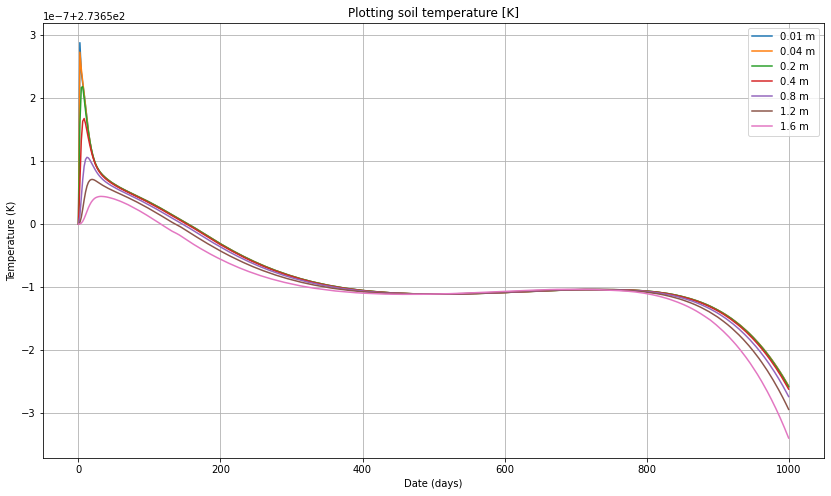

In [33]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil temperature [K]')
plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
plt.plot(df_observation['point -0.04 temperature [K]'][:1000],label='0.04 m')
plt.plot(df_observation['point -0.2 temperature [K]'][:1000],label='0.2 m')
plt.plot(df_observation['point -0.4 temperature [K]'][:1000],label='0.4 m')
plt.plot(df_observation['point -0.8 temperature [K]'][:1000],label='0.8 m')
plt.plot(df_observation['point -1.2 temperature [K]'][:1000],label='1.2 m')
plt.plot(df_observation['point -1.6 temperature [K]'][:1000],label='1.6 m')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

#### Plotting the values 
##### 2. Saturation of liquid

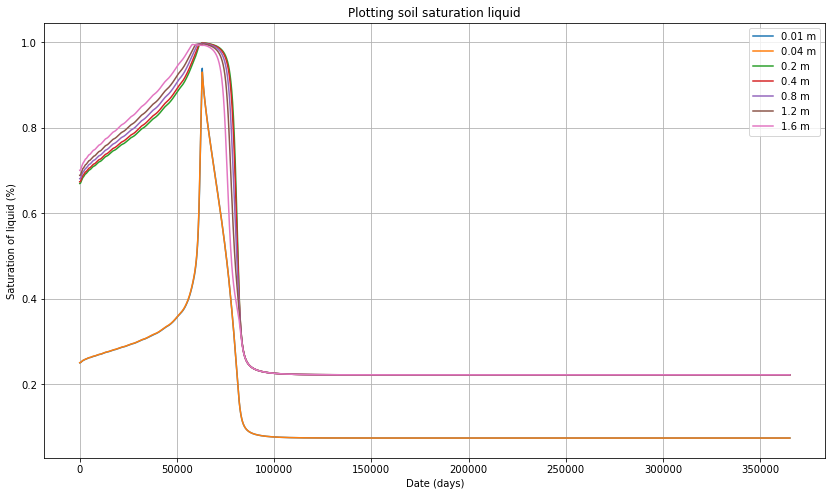

In [35]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil saturation liquid')
plt.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
plt.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
plt.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
plt.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
plt.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
plt.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
plt.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')

plt.ylabel('Saturation of liquid (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

#### 2. Creates the input file for initial conditions based on the spinup observations.

In [6]:
file_name = '/home/rk/ats_rk/testing/ats-demos/rk_model/01_spinup_Case1/01_spinup_Case1_obs.demo'
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        ### Sorting the dataframes 
        time_period.sort()
        print(time_period)

[     0    100    200 ... 182400 182500 182600]


In [10]:
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'column_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    pressure_column = np.array(hdf.get('pressure'))
    print(pressure_column)
    print(np.array(hdf.get('temperature')))
    z_column = np.array(hdf.get('z'))
    print(np.array(hdf.get('z')))

List of datasets in this file: 
 
 ['pressure', 'temperature', 'z']


[-5715161.38222217   -38288.94464055  -137009.46125349  -303729.94754876
  -604598.55774324 -1359991.77832471 -2596737.52666966 -4390081.79553017
 -5899925.38370772 -2201592.7919399   -395567.94691654  -208693.39087789
  -106984.41961357   -37649.29204946    10003.73100321    42614.18374259
    65039.79466325    80682.27302661    92311.972959     227998.28604975
   368520.8505223    425196.35995214   448699.98231278   456942.84785056
   457954.83533019   456061.82400295   453760.93426082   452489.32873421
   453140.85676651   456234.79638825   462026.32667192   470512.04506409
   481399.31851633   494122.28984047   507898.01614843   521834.60226221
   535075.99445141   546946.19192434   557048.06020229   565285.52361617
   571808.38943001   576910.11783969   580922.4326558    584140.76186134
   586791.28979156   589030.36787342   590959.58325265   592643.21104279
   594122.35191633   595428.49402298   596724.59935131

In [13]:
len(z_column)

85

In [27]:
z_column

array([1.00000000e-02, 3.00000000e-02, 5.00000000e-02, 7.00000000e-02,
       9.00000000e-02, 1.10000000e-01, 1.30000000e-01, 1.50000000e-01,
       1.70000000e-01, 1.90000000e-01, 2.10000000e-01, 2.30000000e-01,
       2.50000000e-01, 2.70000000e-01, 2.90000000e-01, 3.10000000e-01,
       3.30000000e-01, 3.50000000e-01, 3.70000000e-01, 3.90000000e-01,
       4.10000000e-01, 4.30000000e-01, 4.50000000e-01, 4.70000000e-01,
       4.90000000e-01, 5.10000000e-01, 5.30000000e-01, 5.50000000e-01,
       5.70000000e-01, 5.90000000e-01, 6.10000000e-01, 6.30000000e-01,
       6.50000000e-01, 6.70000000e-01, 6.90000000e-01, 7.10000000e-01,
       7.30000000e-01, 7.50000000e-01, 7.70000000e-01, 7.90000000e-01,
       8.10000000e-01, 8.30000000e-01, 8.50000000e-01, 8.70000000e-01,
       8.90000000e-01, 9.10000000e-01, 9.30000000e-01, 9.50000000e-01,
       9.70000000e-01, 9.90000000e-01, 1.01200000e+00, 1.03840000e+00,
       1.07008000e+00, 1.10809600e+00, 1.15371520e+00, 1.20845824e+00,
      

In [14]:
# The following data 'layerdepthcentroid_hillslope.csv' was extracted from the meshing files
dz_hillslope = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/layerdepthcentroid_hillslope.csv')
z = dz_hillslope['layer_depth']

# Adding a bunch of cells to reach 45 m with 40 cells
dz = 1.4
i = len(z)
total_depth = z[26]
while total_depth < 45:
    z[i] = z[i - 1] + dz
    total_depth += dz
    i += 1

In [15]:
z.head()

0    0.006000
1    0.019200
2    0.035040
3    0.054048
4    0.076858
Name: layer_depth, dtype: float64

##### Cycle number - 400 
* Checked the results with respect to paraview 
* At the 400th cycle number, the saturation of ice reaches close to 1 m.

In [16]:
# Creating the input file: First creating a pandas dataframe and then converted to header file.

directory = '/home/rk/ats_rk/testing/ats-demos/rk_model/01_spinup_Case1/01_spinup_Case1_obs.demo'

### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{directory}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
     
    # Checked the results with respect to paraview 
    # At the 400th cycle number, the saturation of ice reaches close to 1 m.
    pressure_column = np.array(hdf.get('pressure.cell.0/400'))
    temperature_column = np.array(hdf.get('temperature.cell.0/400'))   

In [17]:
hf_input = h5py.File('IC_column_data_400.h5','w')

In [18]:
hf_input.create_dataset('z',data=z)
hf_input.create_dataset('pressure',data=pressure_column)
hf_input.create_dataset('temperature',data=temperature_column)

<HDF5 dataset "temperature": shape (40, 1), type "<f8">

In [19]:
hf_input.close()

In [20]:
### Reading the file once more 
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'IC_column_data_400.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    pressure_column = np.array(hdf.get('pressure'))
    #print(pressure_column)
    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['pressure', 'temperature', 'z']




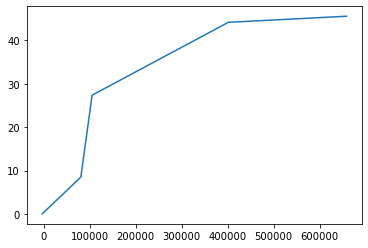

In [21]:
plt.plot(pressure_column, z)

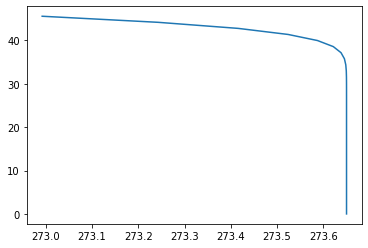

In [22]:
plt.plot(temperature_column, z)

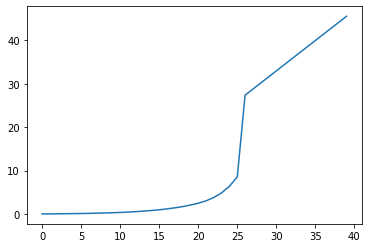

In [23]:
plt.plot(z)

##### For the last cycle number - 182600

In [24]:
# Creating the input file: First creating a pandas dataframe and then converted to header file.

directory = '/home/rk/ats_rk/testing/ats-demos/rk_model/01_spinup_Case1/01_spinup_Case1_obs.demo'

### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{directory}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
     
    # Checked the results with respect to paraview 
    # The last cycle number is 1826
    pressure_column_182600 = np.array(hdf.get('pressure.cell.0/182600'))
    temperature_column_182600 = np.array(hdf.get('temperature.cell.0/182600'))   
    print(pressure_column_182600)

[[3714781.93078202]
 [3714150.95549412]
 [3712300.21421232]
 [3168446.52322115]
 [3167420.55372769]
 [3165786.4942035 ]
 [3163396.59610867]
 [3160157.60925273]
 [3156095.70970546]
 [3151404.01960176]
 [3146402.76033901]
 [3141357.0068994 ]
 [3136230.30752043]
 [3130579.36501833]
 [3123629.65779101]
 [3114325.58896068]
 [3101231.47321683]
 [3082311.38104959]
 [3054598.39147517]
 [3013697.53953879]
 [2953027.51513152]
 [2854563.10832537]
 [2679102.98934333]
 [2362807.67110268]
 [1833661.63990697]
 [1144385.41497924]
 [ 695205.07520895]
 [ 676085.24514531]
 [ 720934.29118163]
 [ 769917.74255422]
 [ 820825.94941246]
 [ 873172.83061623]
 [ 925995.77968893]
 [ 979385.9327306 ]
 [1033990.24735336]
 [1091796.24590128]
 [1155350.771179  ]
 [1230403.38749792]
 [1331804.02012808]
 [1474757.12742547]]


In [118]:
hf_input = h5py.File('IC_column_data_182600.h5','w')

In [119]:
hf_input.create_dataset('z',data=z)
hf_input.create_dataset('pressure',data=pressure_column_182600)
hf_input.create_dataset('temperature',data=temperature_column_182600)

<HDF5 dataset "temperature": shape (40, 1), type "<f8">

In [120]:
hf_input.close()

In [121]:
### Reading the file once more 
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'IC_column_data_182600.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    pressure_column = np.array(hdf.get('pressure'))
    #print(pressure_column)
    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['pressure', 'temperature', 'z']




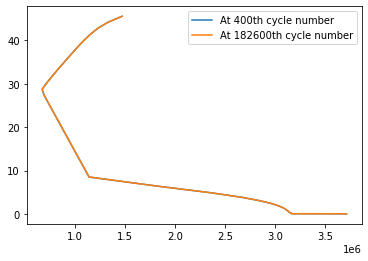

In [126]:
#plt.plot(pressure_column, z)
plt.plot(pressure_column, z,label='At 400th cycle number')
plt.plot(pressure_column_182600, z,label='At 182600th cycle number')
plt.legend()

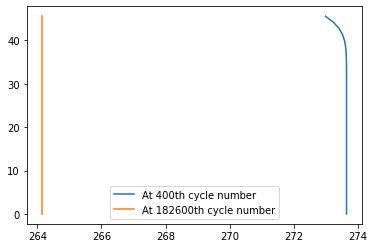

In [128]:
#plt.plot(pressure_column, z)
plt.plot(temperature_column, z,label='At 400th cycle number')
plt.plot(temperature_column_182600, z,label='At 182600th cycle number')
plt.legend()